In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
import re
import json
from sklearn.model_selection import train_test_split

# Split data

In [56]:
humi = pd.read_csv('data/created_datasets/humi_funlines_all_train_upaired.csv')
oneliners = pd.read_csv('data/created_datasets/humorous_oneliners_all.csv')
puns = pd.read_csv('data/created_datasets/whole/puns_all.csv')
short = pd.read_csv('data/created_datasets/shortjokes_all.csv')
neutral = pd.read_csv('data/created_datasets/neutral_text.csv')[['text', 'label']]
neutral200k = pd.read_csv('data/created_datasets/200K_million_news.csv')[['text', 'label']]

In [52]:
oneliners_data = pd.concat([oneliners, neutral]).sample(frac=1).reset_index(drop=True)

In [53]:
train, val = train_test_split(oneliners_data, test_size=0.2)
train.to_csv('data/created_datasets/oneliners_neutral_train.csv', index=False)
val.to_csv('data/created_datasets/oneliners_neutral_test.csv', index=False)

In [77]:
train, val = train_test_split(puns, test_size=0.2)
train.to_csv('data/created_datasets/puns_train.csv', index=False)
val.to_csv('data/created_datasets/puns_test.csv', index=False)

In [50]:
humi.shape

(29321, 5)

In [58]:
short_news = pd.concat([short[['text', 'label']], neutral200k]).sample(frac=1).reset_index(drop=True)
short_news.head()

,text,label
0,teen who kicked cop in the head should be jailed court told,0.0
1,What's the difference between sand and menstrual blood? You can't drink sand.,1.0
2,Why do Canadians prefer their jokes in hexadecimal? Because 7 8 9 A.,1.0
3,Whats the least paying job? British dentist.,1.0
4,falling lake eppalock reservoir taking toll on tourism,0.0


In [59]:
train, val = train_test_split(short_news, test_size=0.2)
train.to_csv('data/created_datasets/short_news_train.csv', index=False)
val.to_csv('data/created_datasets/short_news_test.csv', index=False)

# Load train data

In [60]:
humi = pd.read_csv('data/created_datasets/humi_funlines_all_train_upaired.csv')
oneliners = pd.read_csv('data/created_datasets/oneliners_neutral_train.csv')
puns = pd.read_csv('data/created_datasets/puns_train.csv')
short = pd.read_csv('data/created_datasets/short_news_train.csv')

In [61]:
numberjokes = pd.DataFrame({
    'dataset': ['Humicroedit + Funlines', 'Oneliners', 'Puns', 'Short Jokes'],
    'n_samples': [sum(humi.label), oneliners.shape[0], puns.shape[0], short.shape[0]]
})
numberjokes

,dataset,n_samples
0,Humicroedit + Funlines,4720.0
1,Oneliners,13410.0
2,Puns,3860.0
3,Short Jokes,345316.0


In [70]:
len_humi = [len(row.text.split(' ')) for i, row in humi.iterrows() if row.label == 1]
len_one = [len(row.text.split(' ')) for i, row in oneliners.iterrows() if row.label == 1]
len_pun = [len(row.text.split(' ')) for i, row in puns.iterrows() if row.label == 1]
len_short = [len(row.text.split(' ')) for i, row in short.iterrows() if row.label == 1]

Text(0.5, 0, 'Number of words')

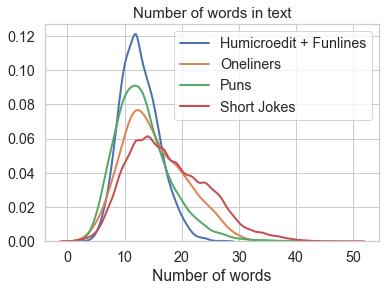

In [71]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 1, figsize = (6,4))
sns.kdeplot(len_humi, label='Humicroedit + Funlines', ax=axs, lw=2)
sns.kdeplot(len_one, label='Oneliners', ax=axs, lw=2)
sns.kdeplot(len_pun, label='Puns', ax=axs, lw=2)
sns.kdeplot(len_short, label='Short Jokes', ax=axs, lw=2)
#sns.barplot(x="dataset", y="n_samples", data=numberjokes, ax=axs[1])
axs.set_title('Number of words in text', size=15)
axs.set_xlabel('Number of words')
#axs[1].set_title('Number of positive samples in each dataset')

# Combinations

In [78]:
humi = pd.read_csv('data/created_datasets/humi_funlines_all_train_upaired.csv')
onel = pd.read_csv('data/created_datasets/oneliners_neutral_train.csv')
puns = pd.read_csv('data/created_datasets/puns_train_all.csv')
short = pd.read_csv('data/created_datasets/short_news_train.csv')

In [73]:
train, val = train_test_split(humi, test_size=0.2)
train.to_csv('data/created_datasets/humicroedit_train.csv', index=False)
val.to_csv('data/created_datasets/humicroedit_validation.csv', index=False)

In [74]:
train, val = train_test_split(onel, test_size=0.2)
train.to_csv('data/created_datasets/oneliners_train.csv', index=False)
val.to_csv('data/created_datasets/oneliners_validation.csv', index=False)

In [79]:
train, val = train_test_split(puns, test_size=0.2)
train.to_csv('data/created_datasets/puns_train.csv', index=False)
val.to_csv('data/created_datasets/puns_validation.csv', index=False)

In [80]:
train, val = train_test_split(short, test_size=0.2)
train.to_csv('data/created_datasets/short_train.csv', index=False)
val.to_csv('data/created_datasets/short_validation.csv', index=False)

In [83]:
short['weight'] = short.label.replace({0: 1, 1:0.5})
short.head(2)

,text,label,weight
0,"A black woman had 5 sons name Tyrone, Tyrone, Tyrone, Tyrone and Tyrone.... How did she tell them apart? She called them by their last names",1.0,0.5
1,nrl eels wrap with matthew elliot,0.0,1.0


In [89]:
basic = pd.concat([humi[['text', 'label']], onel[['text', 'label']], puns[['text', 'label']]])
train, val = train_test_split(basic, test_size=0.2)
train.to_csv('data/created_datasets/basic_v1_train.csv', index=False)
val.to_csv('data/created_datasets/basic_v1_validation.csv', index=False)

In [90]:
basic = pd.concat([onel[['text', 'label']], puns[['text', 'label']]])
train, val = train_test_split(basic, test_size=0.2)
train.to_csv('data/created_datasets/basic_v2_train.csv', index=False)
val.to_csv('data/created_datasets/basic_v2_validation.csv', index=False)

In [96]:
weighted_all = pd.concat([humi[['text', 'label']], onel[['text', 'label']], puns[['text', 'label']], short]).fillna(1)
train, val = train_test_split(weighted_all, test_size=0.2)
train.to_csv('data/created_datasets/weighted_v1_train.csv', index=False)
val.to_csv('data/created_datasets/weighted_v1_validation.csv', index=False)

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [97]:
weighted_all = pd.concat([humi[['text', 'label']], onel[['text', 'label']], puns[['text', 'label']], short[:50000]]).fillna(1)
train, val = train_test_split(weighted_all, test_size=0.2)
train.to_csv('data/created_datasets/weighted_v2_train.csv', index=False)
val.to_csv('data/created_datasets/weighted_v2_validation.csv', index=False)

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [98]:
weighted_all = pd.concat([humi[['text', 'label']], onel[['text', 'label']], puns[['text', 'label']], short[:100000]]).fillna(1)
train, val = train_test_split(weighted_all, test_size=0.2)
train.to_csv('data/created_datasets/weighted_v3_train.csv', index=False)
val.to_csv('data/created_datasets/weighted_v3_validation.csv', index=False)

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
